# Permutation Test
A permutation test is a computational way of testing distributional equivalence of two populations. Recall our dataset from last time:

In [1]:
import pandas
df = pandas.read_csv('data.csv')
df.describe()

,outcome
count,32.000000
mean,7.718750
std,8.023813
min,1.000000
25%,1.750000
50%,6.500000
75%,10.250000
max,41.000000


In [2]:
treatment = df[df['group'] == 't']
control = df[df['group'] == 'c']
treatment.mean()-control.mean()


outcome    7.180392
dtype: float64

The computational question that we ask is whether this difference could have arose from a random partitioning.

In [15]:
import random

def randpartition(data):
    Nt = df[df['group'] == 't'].count()['outcome'] #force it to be a number
    
    Nc = df[df['group'] == 'c'].count()['outcome']
    
    labels = (['t'] * Nt) + (['c']*Nc)
    random.shuffle(labels)
    
    data_copy = data[:] #make a copy of the data
    data_copy['group'] = labels
    return data_copy

randpartition(df)

,group,outcome
0,t,8.0
1,c,4.0
2,c,7.0
3,c,9.0
4,t,3.4
5,t,8.4
6,t,10.0
7,t,15.0
8,c,21.0
9,t,41.0


Then, we generate random partitions and compute what the average treatment effect was. If the treatment truly had an effect it would be far greater than just random assignments.

In [16]:
def simulate_trials(data, trials=100):
    dist = []
    
    for t in range(trials):
        rand = randpartition(data)
        treatment = rand[rand['group'] == 't'].mean()['outcome']
        control = rand[rand['group'] == 'c'].mean()['outcome']
        dist.append(treatment-control)
    
    return dist

simulate_trials(df,trials=5)

[2.7380392156862747,
 2.5121568627450994,
 0.17803921568627423,
 0.9811764705882355,
 -5.218039215686275]

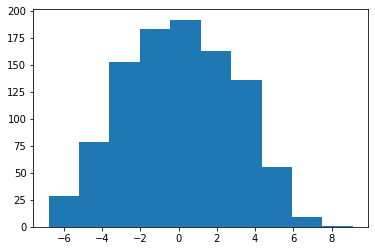

In [13]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.hist(simulate_trials(df,trials=1000))
plt.show()